## Assignment 3 - Dimensionality Reduction

### Paulo Santiago

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding, MDS

# time
import time

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [2]:
df = pd.read_csv('mnist_dataset.csv')
df

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,69996,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,69997,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,69998,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,34999.500000,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,20207.403759,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,17499.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,34999.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,52499.250000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,69999.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7',
       '1x8',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=786)

In [5]:
# drop unused column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# create separate label df
df_label = df.label
df_label

0        2
1        5
2        8
3        0
4        4
        ..
69995    1
69996    7
69997    4
69998    8
69999    7
Name: label, Length: 70000, dtype: int64

In [7]:
# create separate df for data
df_mnist = df.iloc[:, 1:]
df_mnist

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# set X to dataset
X = df_mnist
# set y to label data
y = df_label

# train first 60000
X_train = X[:60000]
y_train = y[:60000]

# test remaining
X_test = X[60000:]
y_test = y[60000:]

__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [9]:
rnd_seed = 42

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=rnd_seed)

# begin timer
start = time.time()
# run random forest classifier fit
rnd_clf.fit(X_train, y_train)
# end timer
end = time.time()
total_time = end - start

print("Time to train the model: {:}s".format(total_time))

# get random forest classifier accuracy score
rnd_clf_score = rnd_clf.score(X_test, y_test)

print("Accuracy score: {:}%".format(rnd_clf_score * 100))

Time to train the model: 37.46186709403992s
Accuracy score: 97.02%


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [10]:
pca = PCA(n_components=0.95, random_state=rnd_seed)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# new random forest classifier on reduced dataset
rf_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=rnd_seed)

# start timer
start = time.time()
rf_clf_reduced.fit(X_train_reduced, y_train)
# end timer
end = time.time()
total_time = end - start

print("Time to train the model on reduced dataset: {:}s".format(total_time))

rnd_clf_reduced_score = rf_clf_reduced.score(X_test_reduced, y_test)
print("Accuracy score on reduced dataset: {:}%".format(rnd_clf_reduced_score * 100))

Time to train the model on reduced dataset: 74.28873586654663s
Accuracy score on reduced dataset: 95.08%


## Analysis
Comparing the training model on the reduced dataset compared to the normal Random Forest Classifier, the reduced dataset takes about 74.5s~ with a 95%~ accuracy score whereas the original Random Forest Classifier training takes about 37.5s~ with a 97%~ accuracy score. We can see that the reduced dataset takes about 40s longer to train with around a 2% drop in accuracy score.

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

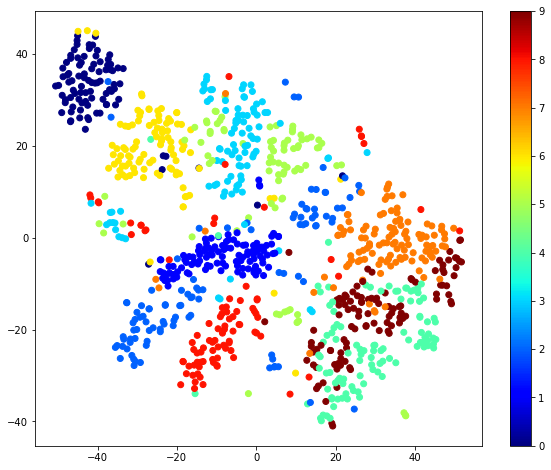

In [11]:
tsne = TSNE(n_components=2, random_state=rnd_seed)
X_tsne = tsne.fit_transform(X_train[:1000])

plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:1000], cmap="jet")
#plt.axis("off")
plt.colorbar()
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

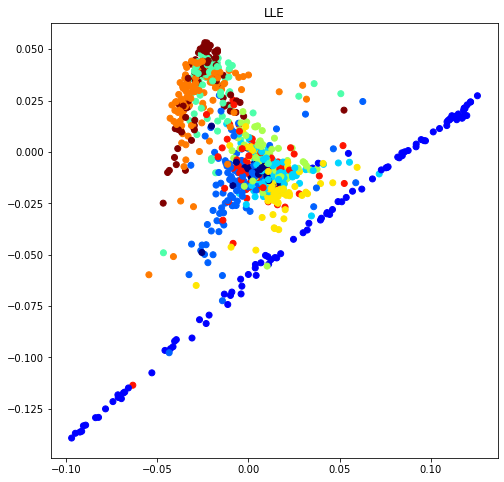

In [12]:
# LLE method
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=rnd_seed)
X_lle = lle.fit_transform(X_train[:1000])

plt.figure(figsize=(8,8))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_train[:1000], cmap="jet")
plt.title("LLE")
plt.show()

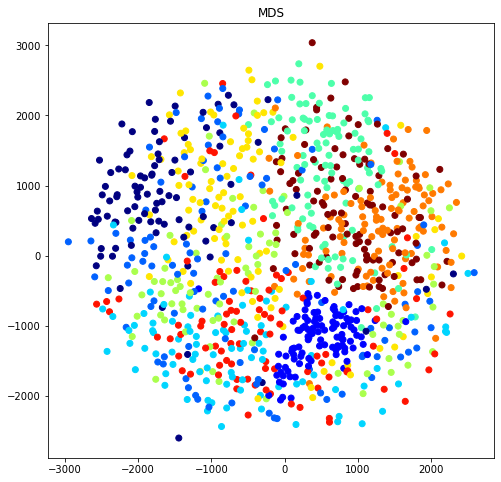

In [13]:
# MDS method
mds = MDS(n_components=2, random_state=rnd_seed)
X_mds = mds.fit_transform(X_train[:1000])

plt.figure(figsize=(8,8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_train[:1000], cmap="jet")
plt.title("MDS")
plt.show()

## Analysis
Comparing the t-SNE method to the LLE and MDS method, for the t-SNE method we can see the model grouping similarities between the data points. We can visiualize the high-dimensional dataset similar to the local structure.

For the LLE method, it constructed linear relationships between its nearest neighbours in a low dimensional representation of the data.

For the MDS method we can see that it preserved pairs and the distance between the instances as close as possible.